<img align="right" src="../../additional_data/banner_siegel.png" style="width:1100px;">

# Image Processing Basics with Numpy and Matplotlib

* [**Sign up to the JupyterHub**](https://www.phenocube.org/) to run this notebook interactively from your browser
* **Compatibility:** Notebook currently compatible with the Open Data Cube environments of the University of Wuerzburg
* **Prerequisites**: There is no prerequisite learning required.


## Background
`Numpy` is a Python library containing multidimensional array and matrix data structures, which allows efficient operations. It supports a wide variety of numerical types, such as `integer` or `Boolean` (True or False). To understand numpy array, it is a grid of elements of the same type that can be indexed in various ways. `Numpy` acts as the basic framework for representating a satellite raster image, which we frequently encounters in this eo2cube tutorial. It is being built upon by `Xarray` library for more advanced features and better fit to the scientific data.

Meanwhile, `Matplotlib` offers many options for users to create static and interactive visualization. The most popular module is `matplotlib.pyplot`, which can be used along really well with `Numpy` array to plot 1D or 2D customized graphics.

To get more information about the `numpy` package, visit the [offical documentation website](https://numpy.org/doc/stable/user/absolute_beginners.html).

To get more information about the `matplotlib` package, visit the [offical documentation website](https://matplotlib.org/2.0.2/index.html).


## Description

This notebook introduces users to the `numpy` and `matplotlib` libraries within the datacube environment. It aims to explain the structure of `numpy.array`, as well as to build up users' capacity to visualize and perform basic processing on raster images. An example Senintel-2 image is used to familiarize users with working on remote sensing data. Within this notebook the following topics are covered:

* Introduction to `matplotplib.pyplot`
* Introduction to dimensionality of `numpy.array`
* Indexing and slicing `numpy.array`
* Creating and Joining `numpy.array`
* Basic statistics
* Linear algebra operations
***

## Setting up
### Load packages
Loading packages is the necessary step for the following demonstrations.

In [46]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #for plotting
from matplotlib.image import imread #for reading image

%matplotlib inline 
#this line allows plotting within the JupyterLab

## **1) Python List versus Numpy Array**
`Numpy.array` is similar to a Python list but allows faster performance, smaller memory size and better functionality. It is a vector collection of items of the same data type. Besides, `numpy.array` can directly handle arithmetic operations. After the import of library (i.e.`import numpy as np`), we can use `np.array()` to convert a Python list into `np.array`.

The code below demonstrates converting a Python list to `np.array`.

In [3]:
list = [0,0,0]
array = np.array(list)

print("The type of variable list: ",type(list),"\nThe type of variable array: ",type(array))

The type of variable list:  <class 'list'> 
The type of variable array:  <class 'numpy.ndarray'>


<br>
<img align="centre" src="np_array.png" style="width:500px;">
<br>

`Numpy.array` can be of different dimensions. It can be either 1D (a series of items), 2D (a matrix of items), or higher-dimensional. To assess the dimension of the `np.array`, we can use the `ndim` argument. Meanwhile, `shape` argument show users the size of the array in all dimensions.

The following code offers examples of 1D, 2D and 3D array.

In [65]:
arr1d = np.array([0,0,0]) #1D array
arr2d = np.array([[0,0,0],[1,1,1]]) #2D array
arr3d = np.array([[[0,0,0],[1,1,1]],[[0,0,0],[1,1,1]]]) #3D array

print("The shape of 1D array: ",arr1d.shape, "\nThe shape of 2D array: ",arr2d.shape, "\nThe shape of 3D array: ", arr3d.shape)
print("\nThe dimension of 1D array: ", arr1d.ndim, "\nThe dimension of 2D array: ", arr2d.ndim, "\nThe dimension of 3D array: ", arr3d.ndim)

The shape of 1D array:  (3,) 
The shape of 2D array:  (2, 3) 
The shape of 3D array:  (2, 2, 3)

The dimension of 1D array:  1 
The dimension of 2D array:  2 
The dimension of 3D array:  3


## **2) Introduction to Matplotlib**
**matplotlib.pyplot** (imported as `plt`) is a popular module for data visualization. `imshow()` is a straight-forward function to display data as image. It displays pixel values with different colors corresponding to the built-in colormaps, default `cmap` will be used if it is not specified. We can input the pixel values as a 2D `np.array`.

The following code is used to plot the previously defined `arr2d`: 0 is represented by purple, 1 by yellow.

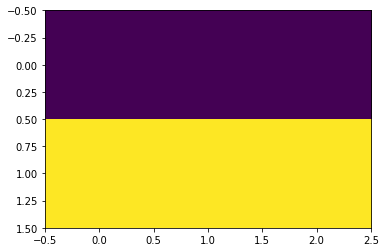

In [319]:
plt.imshow(arr2d)

### **Layout**

`matplotlib.pyplot` offers us plenty of options to customize our plot: The most common customizations are to plot a title, x- and y- labels. `cmap` is a useful argument to pick the prefered color scheme. `tight_layout()` is a neat option to automatically adjust the padding between and around subplots. Other arguments include fontsize and fontweight. `plt.show()` is put at the end when we are ready to display our plot.

More details about the [text properties](https://matplotlib.org/stable/tutorials/text/text_props.html).

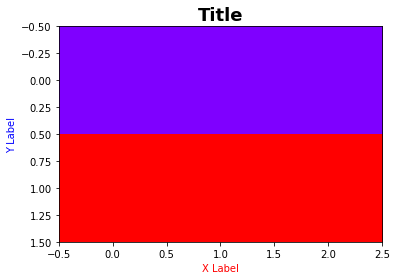

In [420]:
plt.imshow(arr2d, cmap="rainbow") #using a different colormap with imshow()
plt.title("Title", fontsize=18, fontweight="bold") #demonstrate the use of title() with different arguments
plt.xlabel("X Label", fontsize=10, color="red") #demonstrate the use of xlabel() with different arguments
plt.ylabel("Y Label", fontsize=10, color="blue") #demonstrate the use of ylabel() with different arguments
plt.tight_layout()
plt.show()

### **Subplots**

#### Option 1
Subplots can be useful when we wish to have different visualizations in the same plot for comparison. `plt.subplots()` is an option for plotting mulitple charts: we can specifiy `nrows` and `ncols` which define the layout of our plot. `sharex` and `sharey` help us to align data in our plot. Also, we can manually define the size the our figure using `figsize` argument which takes in width and height.

`plt.subplots()` returns a figure object and multiple axes. Hence, ax0 in the following example is a multi-dimensional array of axes. To create charts in a specific subplot, we only need to address the axes object (i.e. `ax0[0,1]` means the 1st row and 2nd column of `ax0`). The figure object can be addressed to plot the main title `suptitle()`.

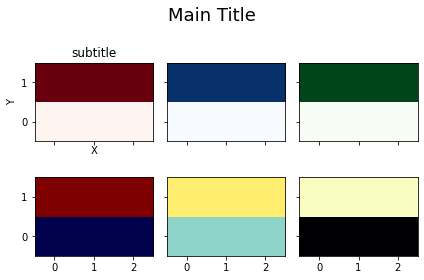

In [397]:
figure, ax0 = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(6,4)) #set up subplots

ax0[0,0].imshow(arr2d, cmap="Reds") #different colormaps are used for imshow() in the subplots
ax0[0,1].imshow(arr2d, cmap="Blues")
ax0[0,2].imshow(arr2d, cmap="Greens")
ax0[1,0].imshow(arr2d, cmap="seismic")
ax0[1,1].imshow(arr2d, cmap="Set3")
ax0[1,2].imshow(arr2d, cmap="magma")

ax0[0,0].set_xlabel('X') #set xlabel for the first subplot only
ax0[0,0].set_ylabel('Y') #set ylabel for the first subplot only
ax0[0,0].set_title('subtitle') #set title for the first subplot only

ax0[0,0].set_xlim([-0.5,2.5]) #set x limit for the first subplot only
ax0[0,0].set_ylim([-0.5,1.5]) #set y limit for the first subplot only

figure.suptitle("Main Title", fontsize=18) #main title

plt.tight_layout() #padding adjustment
plt.show() #display the plot

#### Option 2
Nonetheless, there are more than one method to create subplots. Another option would be combining `plt.subplots()` (with 's') and `plt.subplot()` (without 's'). We can first use `plt.subplots()` without specifying `ncols` and `nrows`, following by `plt.subplot()` to specific the layout (here 2 rows and 3 columns) and the current subplot (i.e. (2,3,1) means 2 rows, 3 columns, the 1st plot). Finally, we can directly plot objects without specifying axes objects. The output is the same as the plot from the code above.

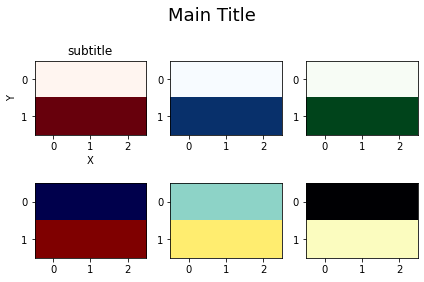

In [384]:
figure1, ax01 = plt.subplots(sharex=True, sharey=True, figsize=(6,4))

plt.subplot(2,3,1) #2 rows, 3 columns, the 1st subplot
plt.imshow(arr2d, cmap="Reds") #belongs to the 1st subplot only
plt.xlabel('X') #belongs to the 1st subplot only
plt.ylabel('Y') #belongs to the 1st subplot only
plt.title('subtitle') #belongs to the 1st subplot only

plt.subplot(2,3,2) #2nd subplot
plt.imshow(arr2d, cmap="Blues")

plt.subplot(2,3,3) #3rd subplot
plt.imshow(arr2d, cmap="Greens")

plt.subplot(2,3,4) #4th subplot
plt.imshow(arr2d, cmap="seismic")

plt.subplot(2,3,5) #5th subplot
plt.imshow(arr2d, cmap="Set3")

plt.subplot(2,3,6) #6th subplot
plt.imshow(arr2d, cmap="magma")

figure1.suptitle("Main Title", fontsize=18) #for the whole figure object

plt.tight_layout() #padding adjustment
plt.show() #display the plot

Sometime it might be helpful to plot subplots and address the axes objects in a loop. `enumerate()` allows us to loop over something (i.e. the color list here) and have an automatic counter. `range()` is a similar function but only keep track of the number, not the counter/index.

`axes.flat` is an attribute of the `np.ndarray`. Using it, we can customize different graphic elements such as the tick labels and subtitles.

Text(0.5, 1.02, 'Main title')

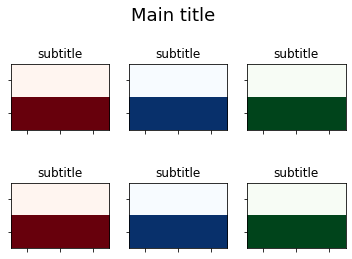

In [152]:
colors = ["Reds","Blues","Greens"] #list of colors
figure2, axes = plt.subplots(nrows=2, ncols=3) #plot subplots

for i, color in enumerate(colors): #loop over the color list
    axes[0][i].imshow(arr2d, cmap=color) #plot subplots
    axes[1][i].imshow(arr2d, cmap=color)

for ax in axes.flat: #loop over axes attribute
    ax.set_title("subtitle") #plot titles for all subplots
    ax.axes.get_xaxis().set_ticklabels([]) #empty list for x ticks
    ax.axes.get_yaxis().set_ticklabels([]) #empty list for y ticks
    
figure2.suptitle('Main title', fontsize=18, y=1.02) #plot main title
 

## **3) Creation and Joining np.array**

Sometimes we might need to generate special `np.array` objects to aid linear algebra operations on the existing arrays, eg. adding an empty layer. After creating the array, we also need to join multiple arrays. In this session, we will learn about how to create those 2D arrays as well as to put them together.

### Creating Specific `np.array`
`np.zeros()` returns an array with pre-defined shape filled with 0. Similarly, `np.ones()` returns one filled with 1. We can also decide what value to fill in the array using `np.full()`. `np.random.rand()` can be used to generate random numbers from a uniform distribution between 0 and 1. With `np.arange()`, we can generate a series of numbers in increasing order  with equal spacing. Here, we need `reshape()` to reshape the array into 10*10 matrix, given that both has the same number of items. 

All special matrices above allow us to do further mathematical operations, which is shown in the example of `np.random.rand()` and `np.arange`. More details will be explained in the Linear Algebra session.

The outcome is plotted in the subplots to visualize their characteristics.

In [436]:
zeros = np.zeros((10,10)) #2D array filled with 0
ones = np.ones((10,10)) #2D array filled with 1
mid = np.full((10, 10), 0.5) #2D array filled with 0.5
random = np.random.rand(10,10)*0.95 # 2D array filled with random numbers times 0.95
identical = np.eye(10,10) #identical matrix
arange = np.multiply(np.arange(100).reshape((10,10)),0.01) #2D array filled with gradually increasing values, times 0.01 using multiply()
#np.linspace(0,99,100, dtype = "int") = np.arange(100)

Text(0.5, 1.0, 'arange()')

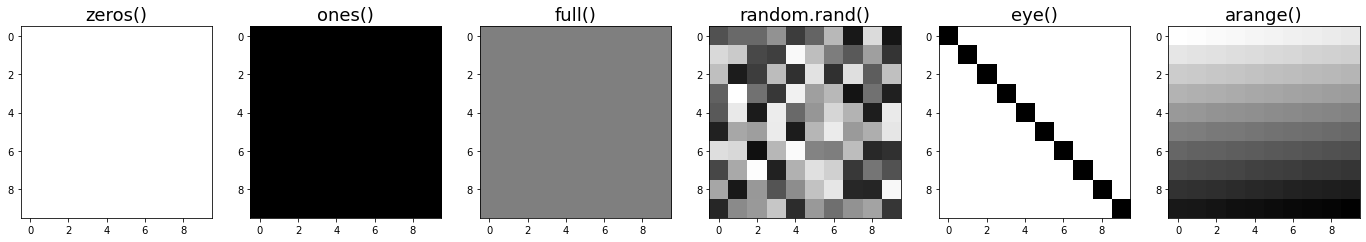

In [438]:
f2, ax2 = plt.subplots(1,6,figsize=(24, 10)) #subplots
ax2[0].imshow(zeros, cmap="binary", vmin = 0, vmax = 1) #plot np.array
ax2[0].set_title('zeros()', fontsize=18) #subtitles

ax2[1].imshow(ones, cmap="binary", vmin = 0, vmax = 1)
ax2[1].set_title('ones()', fontsize=18)

ax2[2].imshow(mid, cmap="binary", vmin = 0, vmax = 1)
ax2[2].set_title('full()', fontsize=18)

ax2[3].imshow(random, cmap="binary", vmin = 0, vmax = 1)
ax2[3].set_title('random.rand()', fontsize=18)

ax2[4].imshow(identical, cmap="binary", vmin = 0, vmax = 1)
ax2[4].set_title('eye()', fontsize=18)

ax2[5].imshow(arange, cmap="binary", vmin = 0, vmax = 1)
ax2[5].set_title('arange()', fontsize=18)

### Joining Multiple Arrays

Joining means putting multiple arrays together into a single array. It is useful when we want to integrate different raster data, eg. calculate a new layer of NDVI (normalized difference vegetation index). There are multiple approaches using different `NumPy` function: Let's have a look into that.

#### **Option 1: np.concatenate()**

`np.concatenate()` can be used to join arrays along an existing axis (along rows as axis=1).

In [449]:
np.concatenate((arr2d, arr2d+2), axis=1)

array([[0, 0, 0, 2, 2, 2],
       [1, 1, 1, 3, 3, 3]])

Same function is used but joined along columns (default).

In [458]:
np.concatenate((arr2d, arr2d+2))

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

#### **Option 2: np.stack() and its variations**

Another option is using `vstack()` which is to stack along columns. The result is same as above.

In [455]:
np.vstack((arr2d, arr2d+2))

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

`hstack()` means joining horizontally.

In [454]:
np.hstack((arr2d, arr2d+2))

array([[0, 0, 0, 2, 2, 2],
       [1, 1, 1, 3, 3, 3]])

`np.stack()` join a sequence of arrays along a new axis (first dimension as axis = 1), axis = -1 can be used to indicate the last dimension.

In [469]:
np.stack((arr2d, arr2d+2), axis=1)

array([[[0, 0, 0],
        [2, 2, 2]],

       [[1, 1, 1],
        [3, 3, 3]]])

We can use `dstack()` to stack along height.

In [460]:
np.dstack((arr2d,arr2d+2))

array([[[0, 2],
        [0, 2],
        [0, 2]],

       [[1, 3],
        [1, 3],
        [1, 3]]])

## **4) Image processing with Numpy and Matplotlib**
Now we understand the elements of forming a `np.array`. Let's start to apply what we learned in an image!

Image is essentially just another 2D `np.array` if we load it into the library. By combining `Numpy` and `Matplotlib`, we can already perform some image processing on satellite raster images. To get you know more about working with remote sensing data, the code below uses an example Sentinel-2 RGB image of Mount Fuji, Japan. It is read as `img` object using `imread()`.

### **Image Inspection**

In [4]:
img = imread('MountFuji.jpg')
img

array([[[ 68,  82,  59],
        [ 86, 101,  78],
        [ 86, 106,  81],
        ...,
        [ 52,  73,  54],
        [ 37,  58,  39],
        [ 36,  58,  37]],

       [[ 73,  87,  64],
        [ 88, 103,  80],
        [ 78,  98,  71],
        ...,
        [ 62,  81,  62],
        [ 61,  80,  60],
        [ 48,  67,  47]],

       [[ 80,  93,  73],
        [ 97, 111,  88],
        [ 99, 117,  91],
        ...,
        [ 72,  91,  71],
        [ 89, 106,  87],
        [ 59,  78,  56]],

       ...,

       [[ 45,  73,  58],
        [ 46,  74,  59],
        [ 48,  79,  63],
        ...,
        [ 10,  20,  12],
        [ 59,  82,  66],
        [ 36,  68,  44]],

       [[ 50,  78,  63],
        [ 59,  87,  72],
        [ 56,  84,  69],
        ...,
        [ 82,  98,  87],
        [ 69,  96,  77],
        [ 31,  65,  40]],

       [[ 52,  80,  65],
        [ 53,  81,  66],
        [ 53,  84,  68],
        ...,
        [ 49,  74,  55],
        [ 35,  64,  42],
        [ 28,  60,  37]]

In [6]:
type(img)

numpy.ndarray

In [48]:
print("The img object is in ",img.ndim, " dimension: x, y, and color channels (Red, Green, Blue).")

The img object is in  3  dimension: x, y, and color channels (Red, Green, Blue).


We can also see the img object is of the type `np.array`.

In [8]:
img.shape

(571, 600, 3)

The shape of `img` object illustrates the **width (571 pixels)**, **height (600 pixels)** and the number of **color channels (3 channels)**. It is how a RGB normally look like as `nd.array`, with width and height depend on the figure size and a depth of 3 corresponding to the RGB color channels.

### **Image Visualization**

#### RGB Image
To view the image, we can use the `imshow()` function: It returns a **RGB image** as we input three color channels (RGB) from `imread()` accordingly in the same order as the `imshow()` rank them. We turn off axis in the plot.

(-0.5, 599.5, 570.5, -0.5)

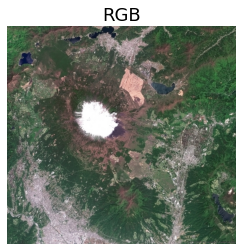

In [7]:
plt.imshow(img)
plt.title("RGB", fontsize=18)
plt.axis("off")

#### False Color Composite

We can also plot a **false color composite** if we change the order of our input color channels. In `img_bgr`, we interchange the **1st** and **3rd** layer in the last (3rd) dimension. It has the order of **BGR** instead of RGB. As a result, the output of `imshow()` changes accordingly.

(-0.5, 599.5, 570.5, -0.5)

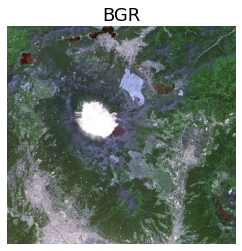

In [32]:
img_bgr = np.stack([img[:,:,2],img[:,:,1],img[:,:,0]], axis=2) #change the order of color layers using stack()
plt.imshow(img_bgr) #plot the BGR image
plt.title("BGR", fontsize=18)
plt.axis("off")

### **Image Statistics**

We can use Numpy functions to calculate basic statistics on our Fuji image. Eg. the `mean()`, `min()`, and the `max()` of the array. 

Here we assign the red channel (1st layer) to `Red`, the green channel (2nd layer) to `Green`, and the blue channel (3rd layer) to `Blue`.

In [18]:
Red = img[:,:,0]
Green = img[:,:,1]
Blue = img[:,:,2]

Then we calculate the mean pixel values of every color channel and the number of pixels in a single layer.

In [20]:
print("Mean for red color: ",round(Red.mean(),1),"\nMean for green color: ", round(Green.mean(),1),"\nMean for blgue color: ", round(Blue.mean(),1), "\nNumber of pixel: ", len(img)*len(img[0]))

Mean for red color:  89.6 
Mean for green color:  99.2 
Mean for blue color:  85.2 
Number of pixel:  342600


#### **Grayscale Image**

Also, we can convert the image into grayscale using the following formula. 

**Y' = 0.2989 RED + 0.5870 GREEN + 0.1140 BLUE**

Then, we can further look into constrast and pixel intensity of our image.

(-0.5, 599.5, 570.5, -0.5)

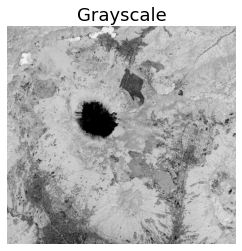

In [33]:
grayscale = 0.2989*Red + 0.5870*Green + 0.1140*Blue #formula for calculating grayscale
plt.imshow(grayscale, cmap="binary") #plot the grayscale image
plt.title("Grayscale", fontsize=18) #plot title
plt.axis("off") #turn off axis

Using `np.min()` and `np.max()`, we can inspect the contrast of our image. They are within the range **[0,256]** as it is a 8-bit color graphic.

In [50]:
print("Minimum value: ",round(np.min(grayscale),1))
print("Maximum value: ",round(np.max(grayscale),1))

Minimum value:  5.3
Maximum value:  255.0


#### Histogram

The above statistical values still cannot give us full information about the distribution of the pixel values. To understand that better, we can plot the histogram  `plt.hist()` after using `ravel()` to return a contiguous flattened array. The argument `bins` is set to 256 to represent our pixel values.

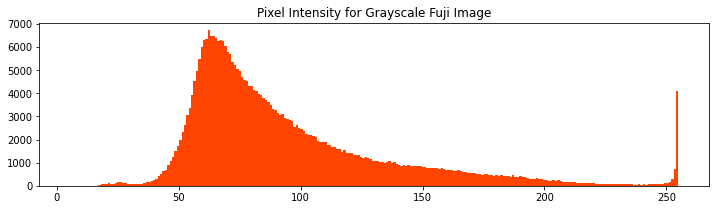

In [62]:
plt.figure(figsize=(12,3)) #set figure size
plt.hist(grayscale.ravel(), bins=256, color="orangered") #plot histogram
plt.title("Pixel Intensity for Grayscale Fuji Image")
plt.show()

From the histogram, we can see that there are a tiny peak in the very dark region (0-50) and a sharp peak at the very bright region (~256), while the majority of the pixels lie between 50 and 100. 

#### **Looking into RGB channels**

Now we know that the structure of a RGB image is composed of three color layers. We also know how we can inspect the pixel values with basic statistics.

Then, we can look at the intensity of different color channels by addressing the variables `Red`, `Green`, and `Blue`. We can see some (subtle) differences of their intensities.

#### Red

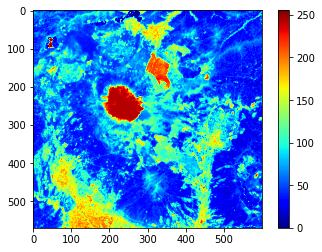

In [473]:
plt.imshow(Red, cmap = "jet") #The intensity of red color
plt.colorbar() #color bar to convey the meaning of our color scheme

#### Green

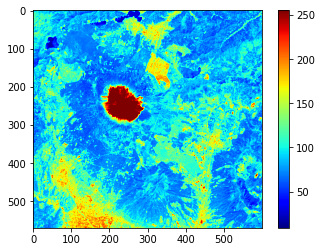

In [471]:
plt.imshow(Green, cmap = "jet") #The intensity of green color
plt.colorbar()

#### Blue

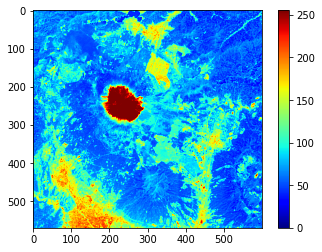

In [472]:
plt.imshow(Blue, cmap = "jet") #The intensity of blue color
plt.colorbar()

To better visualize the RGB channels, the following code plots the channels in the correponsing colors along with the RGB image.

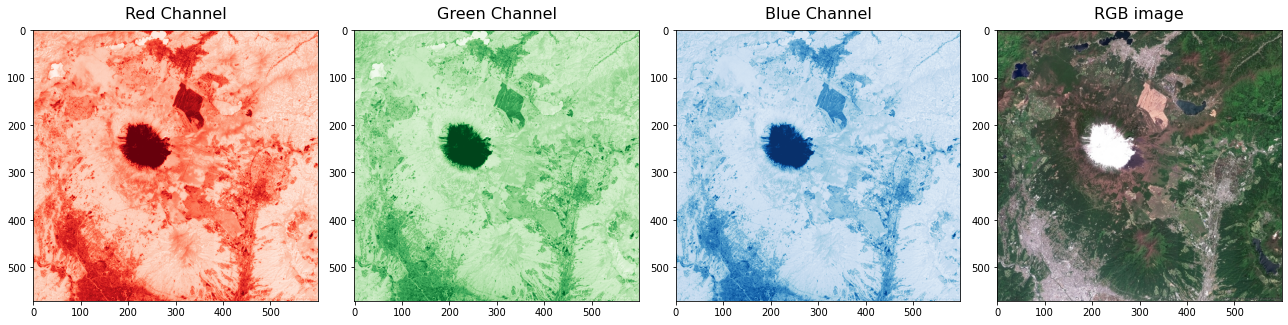

In [36]:
f, ax = plt.subplots(figsize=(18, 12)) #all subplots
plt.subplot(141) #1st plot
plt.imshow(Red, cmap = "Reds") #red channel
plt.title('Red Channel', y=1.02, fontsize=16) #subtitle

plt.subplot(142) #2nd plot
plt.imshow(Green, cmap = "Greens")
plt.title('Green Channel', y=1.02, fontsize=16)

plt.subplot(143) #3rd plot
plt.imshow(Blue, cmap = "Blues")
plt.title('Blue Channel', y=1.02, fontsize=16)

plt.subplot(144) #4th plot
plt.imshow(img)
plt.title('RGB image', y=1.02, fontsize=16)
plt.tight_layout() #padding adjustmnet
plt.show() #display

### **Indexing & Subsetting**

To select certain regions of the image, we can subset our `np.array`. As our array are 3-dimensional, we can index the array using all dimension: **`:`** means all pixels. The following code index the **first pixel (x,y)** with **all color channels**. It returns 3 values, corresponding to RGB intensities.

In [99]:
img[0,0,:]

array([68, 82, 59], dtype=uint8)

As there are about 600 pixels in both x and y dimension, the following code extracts the first half (in y dimension), i.e. the upper half, of the image.

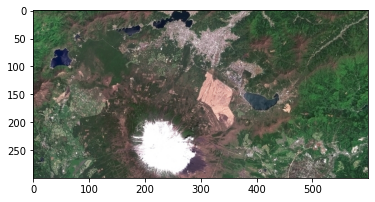

In [29]:
upper_half = img[0:300,:,:]
plt.imshow(upper_half)

The following code extracts the first half in x dimension (left half).

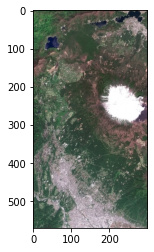

In [28]:
left_half = img[:,0:300,:]
plt.imshow(left_half)

The following code subsets both x and y dimensions and returns the area of the Mount Fuji's peak.

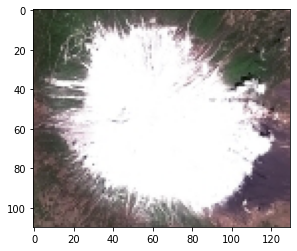

In [53]:
peak = img[190:300,170:300,:]
plt.imshow(peak)

### **Basic Data Manipulation**

#### **Apply Thresholding**

Until here, we understand the basic workings of a RGB image in the `Numpy` library. We can then do our first data manipulation. Do you remember our histogram from the greyscale image? We can use the information it provides to apply a threshold. Let's try a threshold of 230.

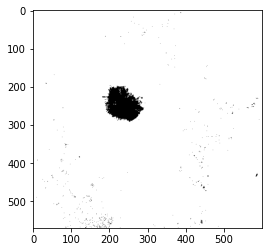

In [45]:
threshold = 230 #here we set our threshold
binary = grayscale > threshold #binary for extracting pixels with a larger value than 170

plt.imshow(binary, cmap="binary") #display our binary image

From the binary image, we can see the peak of Fuji is extracted.

#### **Reshape**

Other manipulation includes reshaping an array. We can also achieve it using `reshape()`. The following code reshape the peak area into shape (100,143,3).

**Tip: Changing to a shape composed of different number of elements will cause an error.**

In [227]:
reshaped = img[190:300,170:300,:].reshape((100,143,3))

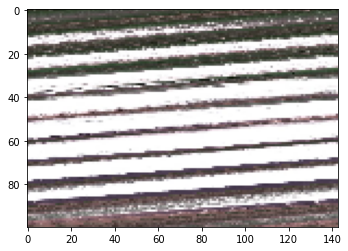

In [228]:
plt.imshow(reshaped)

#### **Changing Values**

We can also assign new values for the `np.array`. `img2` is a deep copy of img. The following code subsets the peak area and assigns new values of zeros (in a form of 2D `np.array` of the same shape).

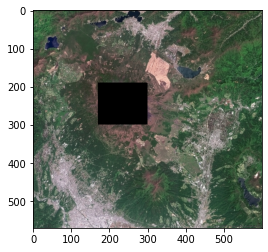

In [104]:
img2 = img.copy() #copy image
img2[190:300,170:300,:] = np.zeros(img[190:300,170:300,:].shape) #zero matrix with the same shape and dimension
plt.imshow(img2)

#### **Linear Algebra**

We can do mathematical operations on the `np.array`. The following code demonstrates how can we do **+ - x /** with the arrays.

In [490]:
arr1 = img[1:20,1:20,0] #a small part of our image
arr2 = img[1:20,1:20,1] #another small part of our image

addition = arr1 + arr2 
#equivalent to np.add(arr1, arr2)

substraction = arr2 - arr1
#equivalent to np.substract(arr1, arr2)

product = arr1*arr2 
# equivalent to np.multiply(arr1, arr2)

division = arr1/arr2 
#equivalent to np.divide(arr1,arr2)

print("Head of 1st array: ",arr1[0, 0:5],"\nHead of 2nd array: ", arr2[0, 0:5],"\n\nAddition: ", addition[0, 0:5])
print("Substraction: ",substraction[0, 0:5],"\nProduct: ", multiply[0, 0:5],"\nDivision: ", division[0, 0:5])


Head of 1st array:  [88 78 76 98 65] 
Head of 2nd array:  [103  98 101 127  94] 

Addition:  [191 176 177 225 159]
Substraction:  [15 20 25 29 29] 
Product:  [104 220 252 158 222] 
Division:  [0.85436893 0.79591837 0.75247525 0.77165354 0.69148936]


#### Example: NDVI
To give an example, we can calculate NDVI of this Mount Fuji image by creating fake data for NIR band to be input in its formula. 

**NDVI = (NIR - Red) / (NIR + Red)**

We can do calculation directly on the `np.array` given that the layers are of **same size, shape and dimension**.

Text(0, 0.5, 'Latitude')

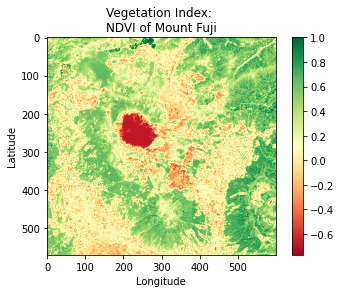

In [198]:
fake_NIR = Green*0.2 - Blue*2 + 250 #fake data for NIR

ndvi = (fake_NIR - Red)/(fake_NIR + Red) #NDVI

plt.imshow(ndvi, cmap = "RdYlGn") #showing the image
plt.colorbar()
plt.title("Vegetation Index: \nNDVI of Mount Fuji")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

Now, we can have a look of the created NDVI. It is a `np.array` with same size in x and y dimension. Yet, it has only one layer in depth.

In [491]:
type(ndvi)

numpy.ndarray

In [204]:
ndvi.shape

(571, 600)

In [205]:
ndvi

array([[ 0.45205479,  0.21360255,  0.19213974, ...,  0.5930824 ,
         0.76030681,  0.7731569 ],
       [ 0.39121756,  0.18542337,  0.31818182, ...,  0.47970864,
         0.4974359 ,  0.64946446],
       [ 0.2864638 ,  0.06181015,  0.02466368, ...,  0.35553169,
         0.11595867,  0.53140578],
       ...,
       [ 0.63656388,  0.62389381,  0.59044369, ..., -0.04958678,
         0.48180816,  0.75951904],
       [ 0.57207207,  0.44835681,  0.49074074, ...,  0.15458937,
         0.33797909,  0.81188119],
       [ 0.54545455,  0.53196347,  0.52270081, ...,  0.61418144,
         0.77205154,  0.84313725]])

#### **Conditional & Other Operations**

We can also do conditional operation on `np.array`. The following code, for example, extracts only ndvi > 0.4 to be plotted, just like what we did in apply thresholding. The white color represents healthy vegetation.

Text(0, 0.5, 'Latitude')

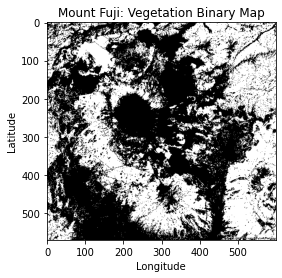

In [203]:
plt.imshow(ndvi > 0.4, cmap = "gist_gray")
plt.title("Mount Fuji: Vegetation Binary Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

`np.negative()` calculate negation of the `np.array` so all values for the pixels are inverted.

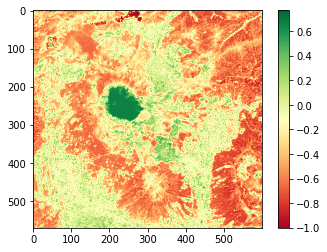

In [238]:
plt.imshow(np.negative(ndvi), cmap = "RdYlGn")
plt.colorbar()

Other conditional operations include the use of `logical_and()` (and), `logical_or()` (or), `logical_xor()` (exclusive or), and `logical_not()` (looking for False value). The following code takes the green and red bands as an example.

Text(0.5, 1.0, 'logical_not()')

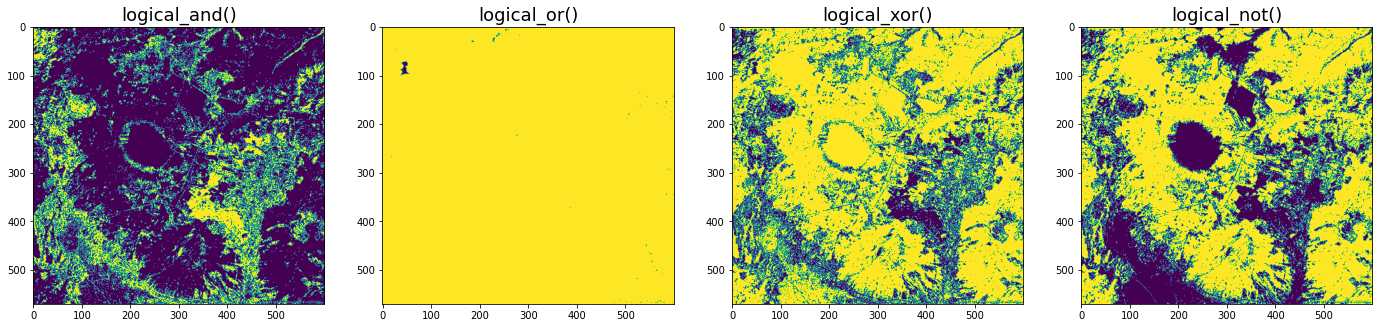

In [442]:
log_and = np.logical_and(Green > 100, Red < 150) #Green > 100 AND Red < 150
log_or = np.logical_or(Green > 100, Red < 150) #Green > 100 OR Red < 150
log_xor = np.logical_xor(Green > 100, Red < 150)
log_not = np.logical_not(Green > 100, Red < 150)

f3, ax3 = plt.subplots(1,4,figsize=(24, 10)) #subplots
ax3[0].imshow(log_and)
ax3[0].set_title('logical_and()', fontsize=18)

ax3[1].imshow(log_or)
ax3[1].set_title('logical_or()', fontsize=18)

ax3[2].imshow(log_xor)
ax3[2].set_title('logical_xor()', fontsize=18)

ax3[3].imshow(log_not)
ax3[3].set_title('logical_not()', fontsize=18)

This training notebook has covered many useful options to work with `NumPy` array, plotting them with `matplotlib.pyplot` and to perform basic image processing such as calculating linear algebra. `Xarray` advances the functionality of `np.array` to work with scientific data. Nonetheless, it is based upon the structure of `np.array`. So this notebook hopefully can help users to build up more understandings in working with remote sensing data in the Open Data Cube environment.

## Recommended next steps

To continue working through the notebooks in this beginner's guide, the following notebooks are designed to be worked through in the following order:

1. [Jupyter Notebooks](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/01_jupyter_introduction.ipynb)
2. [eo2cube](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/02_eo2cube_introduction.ipynb)
3. [Loading Data](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/03_data_lookup_and_loading.ipynb)
4. [Xarray I: Data Structure](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/04_xarrayI_data_structure.ipynb)
5. [Xarray II: Index and Statistics](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/05_xarrayII.ipynb)
6. [Plotting data](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/06_plotting_basics.ipynb)
7. [Spatial analysis](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/07_basic_analysis.ipynb)
8. [Parallel processing with Dask](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/08_parallel_processing_with_dask.ipynb)

The additional notebooks are designed for users to build up both basic and advanced skills which are not covered by the beginner's guide. Self-motivated users can go through them according to their own needs. They act as complements for the guide:
<br>

1. [Python's file management tools](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/I_file_management.ipynb)
2. ***Image Processing basics using NumPy and Matplotlib (this notebook)***
3. [Vector Processing](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/III_process_vector_data.ipynb)
4. [Advanced Plotting](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/IV_advanced_plotting.ipynb)

***
## Additional information

This notebook for the usage of Jupyter Notebook of the [Department of Remote Sensing](http://remote-sensing.org/), [University of Wuerzburg](https://www.uni-wuerzburg.de/startseite/), is partly adapted from [Earth Lab](https://www.earthdatascience.org/courses/intro-to-earth-data-science/), published using the CC BY-NC-ND License 4.0. Thanks!

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 


**Contact:** If you would like to report an issue with this notebook, you can file one on [Github](https://github.com).

**Last modified:** April 2021